# CNN DailyMail
+ CNN/DailyMail数据集由大约300,000对新闻文章及其相应的摘要组成，这些摘要由CNN和DailyMail在其文章中附加的要点组成
+ 该数据集的一个重要方面是，摘要是抽象的，而不是摘录的，这意味着它们由新的句子而不是简单的摘录组成
+ 该数据集可在Hub上找到；我们将使用3.0.0版本，这是一个为摘要而设置的非匿名版本
+ 训练集大小： 286817
+ 验证集大小： 13368
+ 测试集大小： 11487
+ 训练集中平均摘要句子数： 3.72

## 数据准备
+ 因为网络或者代理的问题，数据从云端直接下载有问题，解决方案如下
+ 远程加载 可以参考 https://github.com/huggingface/datasets/issues/996
+ 本地加载 可以参考 https://blog.csdn.net/PolarisRisingWar/article/details/124042709

In [1]:
import datasets
from datasets import load_dataset

# 远程加载
# dataset = load_dataset("cnn_dailymail",  version="3.0.0") # 有bug
# dataset = load_dataset("ccdv/cnn_dailymail",  version="3.0.0")
# 本地加载
dataset = datasets.load_from_disk('../../../resources/dataset/hf_cnn-dm')

print(f"Features: {dataset['train'].column_names}")

/home/users/sunhongchao/miniconda3/envs/bot-mvp/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Features: ['article', 'highlights', 'id']


## 数据的组成列

In [2]:
print(f"Features: {dataset['train'].column_names}")

Features: ['article', 'highlights', 'id']


## 数据的长度统计

Token indices sequence length is longer than the specified maximum sequence length for this model (1894 > 512). Running this sequence through the model will result in indexing errors


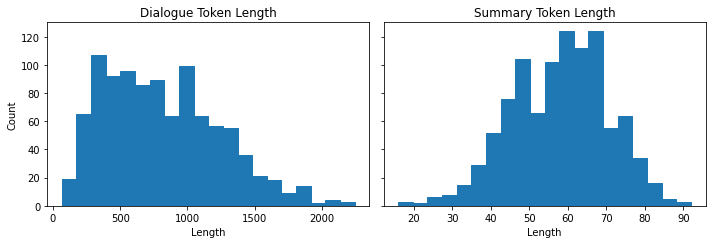

In [3]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer 

model = None
tokenizer = None
device = "cuda" if torch.cuda.is_available() else "cpu" 


with torch.no_grad():
    # model_ckpt = "google/pegasus-cnn_dailymail" 
    model_ckpt = '../../../resources/embedding/google_pegasus-cnn-dm'
    tokenizer = AutoTokenizer.from_pretrained(model_ckpt) 
    model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device) 


import matplotlib.pyplot as plt
d_len = [len(tokenizer.encode(s)) for s in dataset["train"][:1000]["article"]] 
s_len = [len(tokenizer.encode(s)) for s in dataset["train"][:1000]["highlights"]] 
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0") 
axes[0].set_title("Dialogue Token Length") 
axes[0].set_xlabel("Length") 
axes[0].set_ylabel("Count") 
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0") 
axes[1].set_title("Summary Token Length") 
axes[1].set_xlabel("Length") 
plt.tight_layout() 

plt.show()


## 数据示例

In [4]:
sample = dataset["train"][1]
print(f"""
Article (excerpt of 500 characters, total length: {len(sample["article"])}):
""")
print(sample["article"][:500])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])


Article (excerpt of 500 characters, total length: 3192):

(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has n

Summary (length: 180):
Usain Bolt wins third gold of world championship .
Anchors Jamaica to 4x100m relay victory .
Eighth gold at the championships for Bolt .
Jamaica double up in women's 4x100m relay .
